# Exercício 2 - Perceptron de Rosenblatt

Um classificador binário usando o perceptron de Rosenblatt para classificar imagens de círculos ou quadrados.

In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data_df = pd.read_csv("circles_and_squares.csv")

In [3]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
data_df.shape

(1000, 401)

In [5]:
data = data_df.to_numpy()
Xd = data[:800, :]
Xd_test = data[800:, :]

In [6]:
def showImage(image_line_index,data):
    img = data[image_line_index,:-1].reshape((20,20))
    plt.imshow(img,cmap='gray')

In [7]:
def getLabel(image_line_index,data):
    return data[image_line_index,400]

In [8]:
def sgn(v):
    output = []
    for q in range(len(v)):
        if (v[q]>0):
            output.append(1)
        else:
            output.append(-1)
    return output    

Função de ativação não linear -> Neurônio de Rosenblatt

In [9]:
def phi(v):
    return sgn(v)

In [338]:
def countZeros(arr):
    num_zeros = arr.size - np.count_nonzero(arr)
    return num_zeros

def reorderData(Data):
    np.random.shuffle(Data)
    return Data

def organizeDataByEpoch(l,Data,Nb):
        
        first_row = l*Nb
        last_row  = l*Nb + Nb - 1

        X = Data[:,:-1] #get data matrix
        d = Data[:,(Data.shape[1]-1)] #get dada label colummn

        Xl = X[(first_row):last_row]
        dl = d[(first_row):last_row]

        return Xl, dl

def asArray(lst):
     return np.array(lst, dtype=np.float64)



def perceptronRosenblatt(Data,eta,Ne,Nb):
    # Data = data matrix
    # eta = adaptation step
    # Ne = epochs number
    # Nb = size of mini-batch

    vm_1 = []
    ym_1 = []
    em_1 = []
    W    = []

    Nt = Data.shape[0] #get number of rows
    Ncol = Data.shape[1] #get number of columns
    Nmb = int(Nt/Nb) #mini-batch number per epoch

    #0) Initialization
    W.append(np.zeros(Ncol))

    for k in range(1,Ne):
        #1) Reorder Data
        Data  = reorderData(Data)
        for l in range(0,Nmb):
            #2) Separate in X(l) and d(l)
            Xl,dl = organizeDataByEpoch(l,Data,Nb)
            Xl = np.hstack((np.ones((Xl.shape[0], 1)), Xl))
            #3)Training
            m = (k-1)*Nmb + l + 1
            #print("Xl",type(Xl))
            #print(Xl.shape)
            #print("W",type(W[m-1]))
            #print(W[m-1].shape)
            vm_1.append(Xl@W[m-1])
            #print("v",type(vm_1[l]))
            #print(vm_1[l].shape)
            #PRECISA FAZER OS RESHAPE PRA CALCULAR OS PRODUTOS CORRETAMENTE
            ym_1.append(np.array(phi(vm_1[l]),dtype=np.float64))
            #print("y",type(ym_1[l]))
            #print(ym_1[l].shape)
            em_1.append(dl-ym_1[l])
            #print("ey",type(em_1[l]))
            #print(em_1[l].shape)
            W.append(W[m-1] + (eta/Nb)*Xl.T@em_1[l])
            
    last_w_array =  W[len(W)-1]        
    return last_w_array
    

In [341]:
def perceptronAccuracy(W,X_test):
    X = X_test[:,:-1] #get data matrix
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    d = X_test[:,(X_test.shape[1]-1)] #get data label column
    y = np.sign(X@W) #make predictions using the last weight matrix in W
    e = (d-y).astype(int)
    return countZeros(e)/e.size

In [348]:
eta = 0.01
Ne = 10
Nb = 20
Wopt = perceptronRosenblatt(Xd,eta,Ne,Nb)
acuracyRatio = 0.0
for i in range(200):
    W = perceptronRosenblatt(Xd,eta,Ne,Nb)
    if perceptronAccuracy(W, Xd) > acuracyRatio:
        acuracyRatio = perceptronAccuracy(W, Xd)
        Wopt = W    
    #print(str(i%10) + "%" , end=" ")
print(acuracyRatio)  
print(perceptronAccuracy(Wopt, Xd_test))



0.62375
0.62


In [363]:
#etas = [10,1.0,0.1,0.01,0.001,0.0001,0.00001,0.0000001]
#Nes = [1,5,10,50,100,200]
#Nbs = [1,5,10,20,50,100,200]


eta_range = np.arange(0.01, 1.01, 0.01)
Ne_range = np.arange(10, 201, 10)
Nb_range = np.arange(10, 201, 10)

# Load the training and test data
Xd = data[:800, :]
Xd_test = data[800:, :]

# Initialize variables to store the best hyperparameters and accuracy
best_eta = 0
best_Ne = 0
best_Nb = 0
best_accuracy = 0

percentual_of_analysis = 0.0
totalcombinations = eta_range.size*Ne_range.size*Nb.size

# Iterate over the hyperparameter values
for eta in eta_range:
    for Ne in Ne_range:
        for Nb in Nb_range:
            # Train the perceptron with the current hyperparameters
            W = perceptronRosenblatt(Xd, eta, Ne, Nb)

            # Use the trained perceptron to make predictions on the test data
            #y_pred = np.sign(Xd_test[:,:-1] @ W[-1])

            # Calculate the accuracy of the predictions
            accuracy = perceptronAccuracy(W, Xd_test)
            
            # Update the best hyperparameters and accuracy if the current model is better
            if accuracy > best_accuracy:
                best_eta = eta
                best_Ne = Ne
                best_Nb = Nb
                best_accuracy = accuracy
                print("Best PARTIAL accuracy: " + str(best_accuracy) + " | Best eta: " + str(best_eta) + " | Best Ne: " + str(best_Ne) + " | Best Nb: " +  str(best_Nb))

            percentual_of_analysis = percentual_of_analysis + 1
        if int(100*percentual_of_analysis/totalcombinations)%10==0:
            print(str(100*percentual_of_analysis/totalcombinations) + "%")

# Print the best hyperparameters and accuracy
print("##### TRUE BEST RESULTS #####")
print("Best eta:", best_eta)
print("Best Ne:", best_Ne)
print("Best Nb:", best_Nb)
print("Best accuracy:", best_accuracy)

Best PARTIAL accuracy: 0.515 | Best eta: 0.01 | Best Ne: 10 | Best Nb: 10
Best PARTIAL accuracy: 0.52 | Best eta: 0.01 | Best Ne: 10 | Best Nb: 20
Best PARTIAL accuracy: 0.535 | Best eta: 0.01 | Best Ne: 20 | Best Nb: 120
10.0%
20.0%
30.0%
Best PARTIAL accuracy: 0.57 | Best eta: 0.02 | Best Ne: 130 | Best Nb: 160
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
Best PARTIAL accuracy: 0.575 | Best eta: 0.060000000000000005 | Best Ne: 90 | Best Nb: 110
110.0%


KeyboardInterrupt: 

In [459]:
def nextbigger10power(n):
    return 10**math.ceil(math.log10(n))

def nextlower10power(n):
    return 10**(math.ceil(math.log10(n))-1)

def array_to_optimization(min,max):
    min = nextlower10power(min)
    max = nextbigger10power(max)
    
    precision = 0
    if np.log10(min)<0:
        precision = -int(np.log10(min)) 
    else:
        precision =  int(np.log10(min))

    arr = []
    i=0
    while (10**i)*min < max:
        aux = 0
        for j in range(1,10):
            aux = aux + (10**i)*min
            arr.append(np.round(aux,precision))
        i=i+1 
    arr.append(np.round(max,precision))   
    return  np.array(arr, dtype=np.float64)

In [462]:
print(type(np.arange(0.01, 1.01, 0.01)))

<class 'numpy.ndarray'>


In [467]:
eta_range = array_to_optimization(0.0001, 10.0)
Ne_range = array_to_optimization(10, 1000).astype(int)
Nb_range = array_to_optimization(10, 1000).astype(int)

# Load the training and test data
Xd = data[:800, :]
Xd_test = data[800:, :]

# Initialize variables to store the best hyperparameters and accuracy
best_eta = 0
best_Ne = 0
best_Nb = 0
best_accuracy = 0

percentual_of_analysis = 0.0
totalcombinations = eta_range.size*Ne_range.size*Nb.size
print(totalcombinations)

# Iterate over the hyperparameter values
for eta in eta_range:
    for Ne in Ne_range:
        for Nb in Nb_range:
            # Train the perceptron with the current hyperparameters
            W = perceptronRosenblatt(Xd, eta, Ne, Nb)

            # Use the trained perceptron to make predictions on the test data
            #y_pred = np.sign(Xd_test[:,:-1] @ W[-1])

            # Calculate the accuracy of the predictions
            accuracy = perceptronAccuracy(W, Xd_test)
            
            # Update the best hyperparameters and accuracy if the current model is better
            if accuracy > best_accuracy:
                best_eta = eta
                best_Ne = Ne
                best_Nb = Nb
                best_accuracy = accuracy
                print("Best PARTIAL accuracy: " + str(best_accuracy) + " | Best eta: " + str(best_eta) + " | Best Ne: " + str(best_Ne) + " | Best Nb: " +  str(best_Nb))

            percentual_of_analysis = percentual_of_analysis + 1
        if int(100*percentual_of_analysis/totalcombinations)%10==0:
            print(str(100*percentual_of_analysis/totalcombinations) + "%")

# Print the best hyperparameters and accuracy
print("##### TRUE BEST RESULTS #####")
print("Best eta:", best_eta)
print("Best Ne:", best_Ne)
print("Best Nb:", best_Nb)
print("Best accuracy:", best_accuracy)

1540
Best PARTIAL accuracy: 0.63 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 2
Best PARTIAL accuracy: 0.64 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 3
Best PARTIAL accuracy: 0.655 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 4
Best PARTIAL accuracy: 0.69 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 6
Best PARTIAL accuracy: 0.695 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 7
Best PARTIAL accuracy: 0.705 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 9
10.909090909090908%
20.0%


KeyboardInterrupt: 

In [523]:
eta_range = array_to_optimization(0.0001, 10.0)
Ne_range = array_to_optimization(10, 1000).astype(int)
Nb_range = array_to_optimization(10, 1000).astype(int)

# Load the training and test data
Xd = data[:800, :]
Xd_test = data[800:, :]

# Initialize variables to store the best hyperparameters and accuracy
best_eta = 0
best_Ne = 0
best_Nb = 0
best_accuracy = 0

percentual_of_analysis = 0.0
totalcombinations = eta_range.size*Ne_range.size*Nb.size
print("Total number of combinations tested = ",totalcombinations)
print("eta in [" + str(min(eta_range)) + " , " + str(max(eta_range))+ "]")
print("Ne in [" + str(min(Ne_range)) + " , " + str(max(Ne_range))+ "]")
print("Nb in [" + str(min(Nb_range)) + " , " + str(max(Nb_range))+ "]")

# Iterate over the hyperparameter values
for eta in eta_range:
    for Ne in Ne_range:
        for Nb in Nb_range:
            # Train the perceptron with the current hyperparameters
            W = perceptronRosenblatt(Xd, eta, Ne, Nb)

            # Use the trained perceptron to make predictions on the test data
            #y_pred = np.sign(Xd_test[:,:-1] @ W[-1])

            # Calculate the accuracy of the predictions
            accuracy = perceptronAccuracy(W, Xd_test)
            
            # Update the best hyperparameters and accuracy if the current model is better
            if accuracy > best_accuracy:
                best_eta = eta
                best_Ne = Ne
                best_Nb = Nb
                best_accuracy = accuracy
                print("Best PARTIAL accuracy: " + str(best_accuracy) + " | Best eta: " + str(best_eta) + " | Best Ne: " + str(best_Ne) + " | Best Nb: " +  str(best_Nb))

            percentual_of_analysis = percentual_of_analysis + 1
            if ((100*percentual_of_analysis/totalcombinations)%10==0):
                print(str(100*percentual_of_analysis/totalcombinations) + "% -> " + str(percentual_of_analysis))

# Print the best hyperparameters and accuracy
print("##### TRUE BEST RESULTS #####")
print("Best eta:", best_eta)
print("Best Ne:", best_Ne)
print("Best Nb:", best_Nb)
print("Best accuracy:", best_accuracy)

Total number of combinations tested =  1540
eta in [1e-05 , 10.0]
Ne in [1 , 1000]
Nb in [1 , 1000]
Best PARTIAL accuracy: 0.655 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 2
Best PARTIAL accuracy: 0.67 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 9
Best PARTIAL accuracy: 0.675 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 10
Best PARTIAL accuracy: 0.71 | Best eta: 1e-05 | Best Ne: 2 | Best Nb: 30
10.0% -> 154.0
20.0% -> 308.0
30.0% -> 462.0
40.0% -> 616.0
50.0% -> 770.0
60.0% -> 924.0
70.0% -> 1078.0
80.0% -> 1232.0
90.0% -> 1386.0
100.0% -> 1540.0


KeyboardInterrupt: 

In [552]:
eta_range = np.array([1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01])
Ne_range = np.array([1,5,10,20,50,100])
Nb_range = np.array([1,5,10,20,50,100])

# Load the training and test data
Xd = data[:800, :]
Xd_test = data[800:, :]

# Initialize variables to store the best hyperparameters and accuracy
best_eta = 0
best_Ne = 0
best_Nb = 0
best_accuracy = 0

percentual_of_analysis = 0.0

totalcombinations = 0
for eta in eta_range:
    for Ne in Ne_range:
        for Nb in Nb_range:
            totalcombinations = totalcombinations + 1

print("Total number of combinations tested = ",totalcombinations)
print("eta in [" + str(min(eta_range)) + " , " + str(max(eta_range))+ "]")
print("Ne in [" + str(min(Ne_range)) + " , " + str(max(Ne_range))+ "]")
print("Nb in [" + str(min(Nb_range)) + " , " + str(max(Nb_range))+ "]")

# Iterate over the hyperparameter values
for eta in eta_range:
    for Ne in Ne_range:
        for Nb in Nb_range:
            # Train the perceptron with the current hyperparameters
            W = perceptronRosenblatt(Xd, eta, Ne, Nb)

            # Use the trained perceptron to make predictions on the test data
            #y_pred = np.sign(Xd_test[:,:-1] @ W[-1])

            # Calculate the accuracy of the predictions
            accuracy = perceptronAccuracy(W, Xd_test)
            
            # Update the best hyperparameters and accuracy if the current model is better
            if accuracy > best_accuracy:
                best_eta = eta
                best_Ne = Ne
                best_Nb = Nb
                best_accuracy = accuracy
                print("Best PARTIAL accuracy: " + str(best_accuracy) + " | Best eta: " + str(best_eta) + " | Best Ne: " + str(best_Ne) + " | Best Nb: " +  str(best_Nb))

            percentual_of_analysis = percentual_of_analysis + 1
            if ((100*percentual_of_analysis/totalcombinations)%1==0):
                print(str(100*percentual_of_analysis/totalcombinations) + "% -> " + str(percentual_of_analysis))

# Print the best hyperparameters and accuracy
print("##### TRUE BEST RESULTS #####")
print("Best eta:", best_eta)
print("Best Ne:", best_Ne)
print("Best Nb:", best_Nb)
print("Best accuracy:", best_accuracy)

Total number of combinations tested =  288
eta in [1e-08 , 0.1]
Ne in [1 , 100]
Nb in [1 , 100]
Best PARTIAL accuracy: 0.51 | Best eta: 1e-08 | Best Ne: 5 | Best Nb: 5
Best PARTIAL accuracy: 0.6 | Best eta: 1e-08 | Best Ne: 5 | Best Nb: 10
25.0% -> 72.0
50.0% -> 144.0
75.0% -> 216.0
100.0% -> 288.0
##### TRUE BEST RESULTS #####
Best eta: 1e-08
Best Ne: 5
Best Nb: 10
Best accuracy: 0.6


1.0

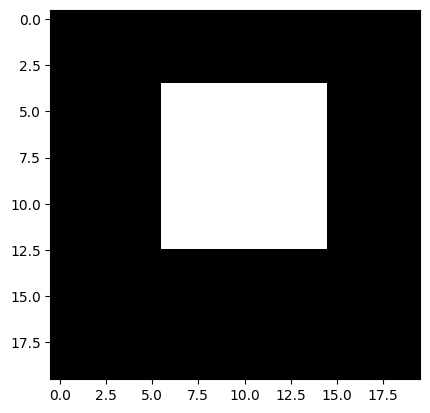

In [15]:
showImage(0,data)
getLabel(0,data)

-1.0

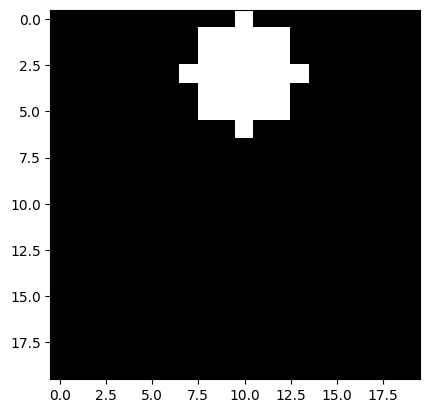

In [16]:
showImage(500,data)
getLabel(500,data)

1.0

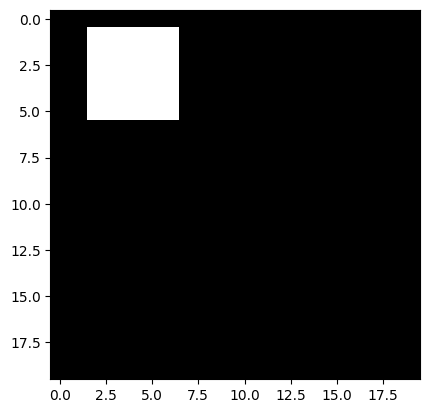

In [17]:
showImage(333,data)
getLabel(333,data)

-1.0

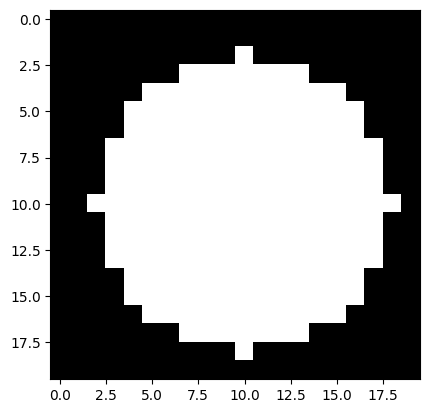

In [18]:
showImage(550,data)
getLabel(550,data)

In [19]:
Xd = data[:800,:]
Xd_test = data[800:,:]